<a href="https://colab.research.google.com/github/Esantomi/digital-humanities/blob/main/lectures%20/%20%EC%9D%B8%EB%AC%B8%EC%A7%80%EC%8B%9D%EC%B2%98%EB%A6%AC%EC%99%80%ED%86%B5%EA%B3%84/05_%EC%9B%8C%EB%93%9C%EC%9E%84%EB%B2%A0%EB%94%A9_Word2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 전통적인 방법

In [ ]:
#@title N-Gram 
문장 = '\uC6C3\uC5B4\uB77C, \uC628 \uC138\uC0C1\uC774 \uB108\uC640 \uD568\uAED8 \uC6C3\uC744 \uAC83\uC774\uB2E4. \uC6B8\uC5B4\uB77C, \uB108 \uD63C\uC790 \uC6B8\uAC83\uC774\uB2E4.'  #@param {type: "string"}
NGram크기 = "3" #@param ["1", "2", "3", "4", "5", "6"] {allow-input: true}

from nltk import ngrams

ngrams = ngrams(문장.split(), int(NGram크기))

for grams in ngrams:
  print(grams)

('웃어라,', '온', '세상이')
('온', '세상이', '너와')
('세상이', '너와', '함께')
('너와', '함께', '웃을')
('함께', '웃을', '것이다.')
('웃을', '것이다.', '울어라,')
('것이다.', '울어라,', '너')
('울어라,', '너', '혼자')
('너', '혼자', '울것이다.')


In [ ]:
#@title 한국어 형태소 분석 - konlpy
한국어문장 = '\uC555\uB2C8\uB2E4, \uB108\uBB34 \uC798 \uC54C\uC9C0\uC694. \uB300\uD55C\uBBFC\uAD6D \uD5CC\uBC95 \uC81C1\uC870 2\uD56D \uB300\uD55C\uBBFC\uAD6D \uC8FC\uAD8C\uC740 \uAD6D\uBBFC\uC5D0\uAC8C \uC788\uACE0 \uBAA8\uB4E0 \uAD8C\uB825\uC740 \uAD6D\uBBFC\uC73C\uB85C\uBD80\uD130 \uB098\uC628\uB2E4. \uAD6D\uAC00\uB780 \uAD6D\uBBFC\uC785\uB2C8\uB2E4'  #@param {type: "string"}

!pip install konlpy
from IPython.display import clear_output
clear_output()

from konlpy.tag import Kkma
kkma = Kkma()


print("  ")
print("###문장 분리###")
print(kkma.sentences(한국어문장))

print("  ")
print("###명사 추출###")
print(kkma.nouns(한국어문장))

print("  ")
print("###형태소 분리###")
print(kkma.morphs(한국어문장))

print("  ")
print("###품사 태깅###")
print(kkma.pos(한국어문장))


  
###문장 분리###
['압니다,', '너무 잘 알지요.', '대한민국 헌법 제 1조 2 항 대한민국 주권은 국민에게 있고 모든 권력은 국민으로부터 나온다.', '국가란 국민입니다']
  
###명사 추출###
['대한', '대한민국', '민국', '헌법', '제', '제1조', '1', '조', '2', '2항', '항', '주권', '국민', '권력', '국가']
  
###형태소 분리###
['알', 'ㅂ니다', ',', '너무', '잘', '알', '지요', '.', '대한민국', '헌법', '제', '1', '조', '2', '항', '대한민국', '주권', '은', '국민', '에게', '있', '고', '모든', '권력', '은', '국민', '으로', '부터', '나오', 'ㄴ다', '.', '국가', '이', '란', '국민', '이', 'ㅂ니다']
  
###품사 태깅###
[('알', 'VV'), ('ㅂ니다', 'EFN'), (',', 'SP'), ('너무', 'MAG'), ('잘', 'MAG'), ('알', 'VV'), ('지요', 'EFN'), ('.', 'SF'), ('대한민국', 'NNG'), ('헌법', 'NNG'), ('제', 'NNG'), ('1', 'NR'), ('조', 'NR'), ('2', 'NR'), ('항', 'NNG'), ('대한민국', 'NNG'), ('주권', 'NNG'), ('은', 'JX'), ('국민', 'NNG'), ('에게', 'JKM'), ('있', 'VV'), ('고', 'ECE'), ('모든', 'MDT'), ('권력', 'NNG'), ('은', 'JX'), ('국민', 'NNG'), ('으로', 'JKM'), ('부터', 'JX'), ('나오', 'VV'), ('ㄴ다', 'EFN'), ('.', 'SF'), ('국가', 'NNG'), ('이', 'VCP'), ('란', 'ETD'), ('국민', 'NNG'), ('이', 'VCP'), ('ㅂ니다', 'EFN')]


In [ ]:
#@title 중국어 형태소 분석 - Jieba
중국어문장 = '\u6211\u7231\u4F60\u3002\u5982\u679C\u8981\u5728\u4E2A\u5206\u611F\u60C5\u4E0A\u52A0\u4E0A\u4E00\u4E2A\u671F\u9650\u7684\u8BDD\u6211\u5E0C\u671B\u662F\u6709\u4E07\u5E74\uFF01'  #@param {type: "string"}

!pip install jieba
from IPython.display import clear_output
clear_output()
# encoding=utf-8

import jieba

seg_list = jieba.cut(중국어문장)  # 默认是精确模式
print("  ")
print("###精确模式###")
print(", ".join(seg_list))

seg_list = jieba.cut_for_search(중국어문장)  # 搜索引擎模式
print("  ")
print("###搜索引擎模式###")
print(", ".join(seg_list))

import jieba.posseg as pseg
words = pseg.cut(중국어문장)
print("  ")
print("###词性标注###")
for word, flag in words:
  print('%s %s' % (word, flag))


Building prefix dict from the default dictionary ...


  
###精确模式###


Dumping model to file cache /tmp/jieba.cache
Loading model cost 1.875 seconds.
Prefix dict has been built successfully.


我爱你, 。, 如果, 要, 在, 个, 分, 感情, 上, 加上, 一个, 期限, 的话, 我, 希望, 是, 有, 万年, ！
  
###搜索引擎模式###
我爱你, 。, 如果, 要, 在, 个, 分, 感情, 上, 加上, 一个, 期限, 的话, 我, 希望, 是, 有, 万年, ！
  
###词性标注###
我爱你 l
。 x
如果 c
要 v
在 p
个分 n
感情 n
上 f
加上 v
一个 m
期限 n
的话 u
我 r
希望 v
是 v
有 v
万年 m
！ x


In [ ]:
#@title One Hot Encoding 기본 - 띄어쓰기
문장1번 = '\uB098\uB294 \uADF8\uB300\uB97C \uC0AC\uB791\uD569\uB2C8\uB2E4.'  #@param {type: "string"}
문장2번 = '\uADF8\uB300\uB97C \uC0AC\uB791\uD569\uB2C8\uB2E4.'  #@param {type: "string"}
문장3번 = '\uADF8\uB300\uB97C \uC800\uC8FC\uD569\uB2C8\uB2E4.'  #@param {type: "string"}
문장4번 = '\uC0AC\uB791\uD569\uB2C8\uB2E4.'  #@param {type: "string"}
문장5번 = '\uC0AC\uB791\uD569\uB2C8\uB2E4'  #@param {type: "string"}
분리단위_띄어쓰기 = ' '  #@param {type: "string"}

sentences = [문장1번, 문장2번, 문장3번, 문장4번, 문장5번]

from sklearn.preprocessing import MultiLabelBinarizer
import pandas as pd

print("  ")
print("###입력 내용###")
print(sentences)

mlb = MultiLabelBinarizer()
df = pd.DataFrame(mlb.fit_transform([x.split(분리단위_띄어쓰기) for x in sentences]),columns=mlb.classes_)
print("  ")
print("###One Hot Encoding 결과###")
df

  
###입력 내용###
['나는 그대를 사랑합니다.', '그대를 사랑합니다.', '그대를 저주합니다.', '사랑합니다.', '사랑합니다']
  
###One Hot Encoding 결과###


,그대를,나는,사랑합니다,사랑합니다.,저주합니다.
0,1,1,0,1,0
1,1,0,0,1,0
2,1,0,0,0,1
3,0,0,0,1,0
4,0,0,1,0,0


In [ ]:
#@title One Hot Encoding 응용 with 형태소분석(konlpy)
문장1번 = '\uB098\uB294 \uADF8\uB300\uB97C \uC0AC\uB791\uD569\uB2C8\uB2E4.'  #@param {type: "string"}
문장2번 = '\uADF8\uB300\uB97C \uC0AC\uB791\uD569\uB2C8\uB2E4.'  #@param {type: "string"}
문장3번 = '\uADF8\uB300\uB97C \uC800\uC8FC\uD569\uB2C8\uB2E4.'  #@param {type: "string"}
문장4번 = '\uC0AC\uB791\uD569\uB2C8\uB2E4.'  #@param {type: "string"}
문장5번 = '\uC0AC\uB791\uD569\uB2C8\uB2E4'  #@param {type: "string"}

sentences = [문장1번, 문장2번, 문장3번, 문장4번, 문장5번]

!pip install konlpy
from IPython.display import clear_output
clear_output()

from konlpy.tag import Kkma
from konlpy.utils import pprint

kkma = Kkma()

pos = lambda d: [''.join(p) for p in kkma.morphs(d)]
msentences = [pos(result) for result in sentences]

print("  ")
print("###형태소 분리###")
pprint(msentences)

from sklearn.preprocessing import MultiLabelBinarizer
import pandas as pd
mlb = MultiLabelBinarizer()
df = pd.DataFrame(mlb.fit_transform(msentences),columns=mlb.classes_)

print("  ")
print("###One Hot Encoding 결과###")
df


  
###형태소 분리###
[['나', '는', '그대', '를', '사랑', '하', 'ㅂ니다', '.'],
 ['그대', '를', '사랑', '하', 'ㅂ니다', '.'],
 ['그대', '를', '저주', '하', 'ㅂ니다', '.'],
 ['사랑', '하', 'ㅂ니다', '.'],
 ['사랑', '하', 'ㅂ니다']]
  
###One Hot Encoding 결과###


,.,ㅂ니다,그대,나,는,를,사랑,저주,하
0,1,1,1,1,1,1,1,0,1
1,1,1,1,0,0,1,1,0,1
2,1,1,1,0,0,1,0,1,1
3,1,1,0,0,0,0,1,0,1
4,0,1,0,0,0,0,1,0,1


## Word2Vec

In [ ]:
#@title 데이터 불러오기- 기생충 리뷰 데이터
구글드라이브ID = '1515F_ybsrR2VwxWDv2Q0Mw_YBS6trNhR'  #@param {type: "string"}
파일저장이름 = 'rawdata.txt'  #@param {type: "string"}

import time
start = time.time() # 시작시간


# 구글 드라이브 연결을 위한 기본 세팅
!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# 문서 ID로 실제 파일 불러오는 법
# 실습을 위한 기생출 영화 리뷰 데이터 
# https://drive.google.com/open?id=1515F_ybsrR2VwxWDv2Q0Mw_YBS6trNhR
rawdata_downloaded = drive.CreateFile({'id': 구글드라이브ID })
rawdata_downloaded.GetContentFile(파일저장이름)

print(파일저장이름+"을 정상적으로 가져왔습니다.")

import pandas as pd
# 파일을 DataFrame으로 전환
rawdata = pd.read_csv(파일저장이름, header=0, encoding='utf-8', engine='python')
rawtext = pd.DataFrame(rawdata['text'])
## 공백값(NAN) 제거
rawtext = rawtext.dropna(axis=0)
rawtext

rawdata.txt을 정상적으로 가져왔습니다.


,text
0,"비에 젖지 않는 고급 장난감 텐트와, 비에 젖다 못해 잠겨버리는 반지하 가구"
1,최근 본 영화중 가장 충격적이었음... 근데 보니까 15세말고 19세 걸어야될것같던데..
2,"지하철이라는 단어가 언급되는 순간, 대다수의 관객은 자신이 어디에 이입할 지를 안다."
3,전 가정부가 집 벨 누를 때 부터 이 영화는 장르가 바뀐다... 역대급 꿀잼영화
4,황금종려상 수상작을 자막 없이 볼 수 있다는 것 자체로 좋다.
...,...
9995,보고나면 계속 그 영화에 대한 생각을 줄줄이 하게되고계속 후기들을 읽게하는 그런 영...
9996,"친구랑 보고나서 누나랑 한 번더 보겠다고 약속했는데, 힘들것 같다.. 발직한 웃음이..."
9997,최우식 돌 들고 내려갈때 죽이면 좋겠다 생각했다. 나도 기생충이었나보다..
9998,봉준호는 천재다 시나리오 연출 엔딩까지 마음에듬


In [ ]:
#@title 형태소 분석 - 명사만 추출

!pip install konlpy
from IPython.display import clear_output
clear_output()

import time
start_vect=time.time()

from konlpy.tag import Okt
from konlpy.utils import pprint
okt = Okt()

pos = lambda d: [''.join(p) for p in okt.nouns(d)]
texts_ko = [pos(result) for result in rawtext['text']]

print(texts_ko)
print("형태소 분석 소요 시간: %0.2f Minutes"%((time.time() - start_vect)/60))

[['비', '고급', '장난감', '텐트', '비', '반지하', '가구'], ['최근', '영화', '가장', '충격', '보', '세', '세'], ['지하철', '단어', '언급', '순간', '대다수', '관객', '자신', '어디', '이입'], ['전', '가정부', '집', '벨', '때', '부터', '이', '영화', '장르', '역대', '꿀잼', '영화'], ['황금종려상', '수상작', '자막', '볼', '수', '것', '자체'], ['반지하', '제일', '아래', '줄', '지하도'], ['뭔가', '영화', '영화', '내내', '가슴', '뭔가', '영화', '수석', '영화'], ['누군가', '냄새', '평가', '묘사', '수', '것', '또한', '권력', '냄새', '서로', '경계', '구분', '동물', '세계', '우리', '사회'], ['박서준'], ['나', '또한', '누군가', '사람', '냄새', '얼굴'], ['봉테', '일이', '간과', '것', '납골당', '눈높이', '곳', '가장', '죽음', '빈부격차'], ['등급', '정이', '청소년', '감당', '버거운', '내용'], ['막판', '기우', '바램', '계획', '계획'], ['누군가', '빗물', '장난감', '텐트', '도', '막', '수', '다른', '누군가', '똥', '정물', '계획', '수', '우리네', '사회', '구조', '냉혹', '현실', '연출', '수석'], ['갑', '끼리', '우리', '사회', '축소', '판'], ['박사', '기택', '냄새', '대해', '언급', '기우', '기정', '냄새', '대해', '언급', '기우', '기정은', '명문', '교육', '자기', '선상', '설', '수', '사람', '인식', '기택', '하등', '사람', '인식', '때문'], ['사이다', '소주', '세', '잔', '기분', '첫', '잔', '두번째', '잔', '세번', '잔'], 

In [ ]:
#@title Word2Vec 학습
size_차원 =   100#@param {type: "number"}
window_탐색범위 =   10#@param {type: "number"}
min_count_최소출현횟수 =   0#@param {type: "number"}
iter_학습횟수 =   100#@param {type: "number"}
sg_CBOWorSkipGram =   1#@param {type: "number"}

start_vect=time.time()

# training 모델 훈련

from gensim.models import word2vec
wv_model_ko = word2vec.Word2Vec(texts_ko, size=size_차원, 
                                window=window_탐색범위, 
                                min_count=min_count_최소출현횟수, 
                                iter=iter_학습횟수, 
                                sg=sg_CBOWorSkipGram)
## size=차원의 숫자(올라갈수록 상세히 하지만 느림) 100
## window=주변을 보는 범위(앞뒤 5) 
## min_count=최소 출현 빈도 100
## workers=사용하는 CPU 코어 숫자
## iter = 반복횟수 10
## sg= CBOW=0 / Skip-Gram=1

#from gensim.models import FastText
#wv_model_ko = FastText(texts_ko, size=1000, window=10, min_count=0, iter=10, sg=1)


wv_model_ko.init_sims(replace=True)
wv_model_ko.save('ko_word2vec_e.model')

print("Word2Vec 훈련 소요 시간: %0.2f Minutes"%((time.time() - start_vect)/60))

Word2Vec 훈련 소요 시간: 0.79 Minutes


In [ ]:
#@title Word2Vec 학습 결과


## 입력 단어 확인용
from gensim.models import word2vec
model = word2vec.Word2Vec.load('ko_word2vec_e.model')

## 총 단어 숫자
print("  ")
print("###전체 단어 숫자: "+ str(len(model.wv.vocab.keys())))

## 전체 단어 리스트
print("  ")
print("###전체 단어 목록: ")
print(list(model.wv.index2word))

  
###전체 단어 숫자: 7236
  
###전체 단어 목록: 
['영화', '생각', '사람', '이', '것', '감독', '기생충', '보고', '봉준호', '그', '기분', '왜', '현실', '가족', '나', '장면', '말', '수', '냄새', '그냥', '내', '진짜', '상', '정말', '연기', '더', '최고', '충격', '때', '점', '작품', '세', '느낌', '사회', '재미', '평점', '좀', '내용', '계획', '송강호', '돈', '배우', '보기', '집', '우리', '가난', '하나', '부자', '볼', '관람', '스토리', '반지하', '별로', '정도', '이해', '내내', '마음', '처음', '황금종려상', '거', '표현', '듯', '마지막', '뭔가', '연출', '기대', '난', '시간', '여운', '다시', '뭐', '평', '의미', '역시', '칸', '저', '등급', '이야기', '속', '끝', '안', '몰입', '임', '걸', '모두', '한국', '때문', '인간', '후', '인생', '못', '계속', '봉', '조여정', '한국영', '선', '감상', '가장', '관객', '또', '장르', '모습', '번', '함', '이유', '삶', '중간', '감', '한번', '대한', '살인', '전', '남', '모든', '개인', '소름', '꼭', '이정은', '전개', '공감', '알', '건', '예술', '결말', '절대', '자체', '가슴', '비', '가정부', '개', '이선균', '영화관', '계급', '이영화', '빈부격차', '이상', '평론가', '기생', '줄', '부분', '살', '감정', '지하', '청소년', '다른', '금', '보지', '이건', '자신', '추천', '중', '무슨', '만', '게', '순간', '천재', '제목', '애', '눈', '지금', '가지', '지하철', '세상', '무', '반전', '전혀

In [ ]:
#@title Word2Vec을 통한 의미연산 01 - 개별 단어

개별단어 = ['봉준호']  #@param 

print(wv_model_ko.most_similar(positive=개별단어, topn=50))

[('감독', 0.819044828414917), ('전성기', 0.5797091126441956), ('난놈', 0.5787737369537354), ('영화', 0.5594586133956909), ('연기상', 0.5583904981613159), ('쏭강', 0.5574919581413269), ('영기', 0.5572413206100464), ('웠', 0.5566908121109009), ('호우', 0.5563613176345825), ('천재', 0.5562732815742493), ('봉드', 0.5555846095085144), ('쵝', 0.5424066185951233), ('이쯤', 0.537818193435669), ('템포', 0.5345880389213562), ('술사', 0.5343401432037354), ('활약', 0.5339028239250183), ('완벽주의자', 0.5303559303283691), ('질타', 0.5240960717201233), ('쭉쭉', 0.5220781564712524), ('이즈', 0.5205239057540894), ('플로우', 0.5163521766662598), ('신조어', 0.5160694122314453), ('엄다', 0.5141828060150146), ('쥑이', 0.5138148665428162), ('능가', 0.5082787871360779), ('거르는걸', 0.5081990957260132), ('지니어스', 0.507540225982666), ('차기작', 0.5074214339256287), ('중기', 0.5065922141075134), ('발연기', 0.5061291456222534), ('콤비', 0.5052095651626587), ('재력', 0.5020846724510193), ('촤르르', 0.5008008480072021), ('그었다', 0.5003645420074463), ('범작', 0.5000710487365723), ('장선', 0.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """


In [ ]:
#@title Word2Vec을 통한 의미연산 01 - 개별 단어

개별단어 = ['송강호']  #@param 

print(wv_model_ko.most_similar(positive=개별단어, topn=50))

[('이선균', 0.5814700126647949), ('크흐', 0.5803073644638062), ('쪽임', 0.5465590953826904), ('야외', 0.525441586971283), ('이십분', 0.5182337164878845), ('복장', 0.5072498321533203), ('반명', 0.4967282712459564), ('울음', 0.4956039786338806), ('바랬', 0.4811165928840637), ('까비', 0.4809719920158386), ('그땐', 0.47795623540878296), ('날로', 0.4768986403942108), ('남자에게', 0.47653928399086), ('눈빛', 0.4735910892486572), ('몬죄', 0.472365140914917), ('두둔', 0.4719240069389343), ('당초', 0.4718386232852936), ('출연자', 0.47169870138168335), ('파슬리', 0.47125279903411865), ('기미', 0.4706569314002991), ('취', 0.4672173857688904), ('이성', 0.4663124680519104), ('이태리', 0.4661903381347656), ('듬새', 0.46564459800720215), ('애시', 0.46428996324539185), ('리사', 0.46384766697883606), ('원주민', 0.4624834358692169), ('눈동자', 0.4605579972267151), ('영기', 0.45998379588127136), ('화남', 0.45949292182922363), ('얼', 0.4584881067276001), ('연장', 0.4576076865196228), ('포즈', 0.4575357139110565), ('지드', 0.4572986364364624), ('굿굿귯귯', 0.45678791403770447), ('업무'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """


In [ ]:
#@title Word2Vec을 통한 의미연산 02 - 의미 더하기 빼기

긍정더하기 = ['현실', '사회']  #@param 
부정빼기 = ['꿈'] #@param 

print(wv_model_ko.most_similar(positive=긍정더하기, negative=부정빼기, topn=50))

[('계급', 0.4791901707649231), ('비판', 0.4732058048248291), ('애로', 0.4640670418739319), ('녹', 0.4586521089076996), ('여준', 0.45863065123558044), ('서열', 0.4578244090080261), ('계층', 0.4497562050819397), ('익살', 0.4478898048400879), ('노동자', 0.4354006350040436), ('우리', 0.4336310625076294), ('노란색', 0.4324791431427002), ('엇읍', 0.43056488037109375), ('빨간색', 0.4297003746032715), ('자리다툼', 0.4273379147052765), ('통렬', 0.42520904541015625), ('요리사', 0.4239269196987152), ('도감', 0.4231909215450287), ('상과', 0.42212697863578796), ('하얀색', 0.42054229974746704), ('현대', 0.4204022288322449), ('분포', 0.4192434549331665), ('웨이브', 0.41857537627220154), ('유희', 0.4161851406097412), ('완급', 0.41492146253585815), ('표면', 0.4118230938911438), ('난제', 0.4107387065887451), ('자칫', 0.4079276919364929), ('부르주아', 0.4078095257282257), ('그로', 0.4067537188529968), ('굴속', 0.40449854731559753), ('섬짓', 0.4017508625984192), ('환기', 0.40036457777023315), ('촉구', 0.39932817220687866), ('해주', 0.39609891176223755), ('단면', 0.39416733384132385)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


In [ ]:
#@title 클러스터링(그룹화)
그룹숫자 =   10#@param {type: "number"}
출력숫자 = 12  #@param {type: "number"}


## 입력 단어 확인용
from gensim.models import word2vec
model = word2vec.Word2Vec.load('ko_word2vec_e.model')

from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
import time

# 단어 벡터에서 k-means를 실행하고 일부 클러스터를 찍어본다.
start = time.time() # 시작시간

# 몇개로 분리하는지는 당신의 마음! 여기서는 일단 10으로
word_vectors = model.wv.syn0 # 어휘의 feature vector
num_clusters = 그룹숫자
num_clusters = int(num_clusters)

# K means 를 정의하고 학습시킨다.
kmeans_clustering = KMeans( n_clusters = num_clusters )
idx = kmeans_clustering.fit_predict( word_vectors )

# 끝난 시간에서 시작시각을 빼서 걸린 시간을 구한다.
end = time.time()
elapsed = end - start
print("K Means clustering 학습 시간: ", elapsed, "seconds.")

# 각 어휘 단어를 클러스터 번호에 매핑되게 word/Index 사전을 만든다.
idx = list(idx)
names = model.wv.index2word
word_centroid_map = {names[i]: idx[i] for i in range(len(names))}
#     word_centroid_map = dict(zip( model.wv.index2word, idx ))

# 클러스터의 처음 ??개를 출력
for cluster in range(0,출력숫자):
    # 클러스터 번호를 출력
    print("\nCluster {}".format(cluster))

    # 클러스터 번호와 클러스터에 있는 단어를 찍는다.
    words = []
    for i in range(0,len(list(word_centroid_map.values()))):
        if( list(word_centroid_map.values())[i] == cluster ):
            words.append(list(word_centroid_map.keys())[i])
    print(words)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).


K Means clustering 학습 시간:  9.769514322280884 seconds.

Cluster 0
['사람', '기생충', '가족', '냄새', '돈', '가난', '부자', '이유', '살인', '남', '공감', '이선균', '기생', '누구', '건가', '쓰레기', '층', '일', '등', '바퀴벌레', '자기', '서민', '제일', '사기', '박사', '상류층', '노력', '물', '해', '행동', '의식', '본인', '벌레', '누가', '죄', '가정', '라면', '코', '해도', '범죄', '거지', '사기꾼', '입장', '감정이입', '를', '주인공', '불', '혐오', '부잣집', '놈', '거기', '명', '잘못', '민', '죽', '피해', '마냥', '자식', '피', '시', '뻔', '로', '집안', '대화', '채', '열등감', '포장', '평생', '하류', '욕심', '애초', '식구', '선택', '무시', '실제', '과외', '탓', '관계', '치', '가치', '싸움', '네', '둘', '차', '사장', '깨', '을', '발', '기득권', '양심', '무기', '는걸', '산다', '악인', '정당화', '주인', '이입', '손', '심', '아빠', '피해자', '집주인', '인', '생활', '짓', '일반', '능력', '박스', '부유', '위선', '대다수', '환경', '생일', '처', '칼부림', '심지어', '피자', '정상', '택', '키', '바닥', '행위', '파괴', '동정', '사지', '미화', '기회', '위조', '캠핑', '기적', '팔', '벌', '술판', '그동안', '집단', '조작', '온갖', '죄인', '저런', '거짓', '한자', '자격지심', '달라', '조차', '덕', '반대', '곰팡이', '합리화', '절대로', '직장', '집의', '칠', '파탄', '살인자', '화일', '산', '교육', '대변', 

In [ ]:
#@title 시각화를 위한 준비(폰트)

# your current directory 
!pwd

## 한국어:     !wget "https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKkr-hinted.zip"
## 번자체한자: !wget "https://noto-website-2.storage.googleapis.com/pkgs/NotoSerifCJKtc-hinted.zip"

!wget "https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKkr-hinted.zip"

# remove files in zip file if they exist
!rm LICENSE_OFL.txt README *.otf 

# unzip downloaded files
## 한국어: !unzip NotoSansCJKkr-hinted.zip
## 번체자한자: !unzip NotoSerifCJKtc-hinted.zip

!unzip NotoSansCJKkr-hinted.zip

# move font files to 'fonts/truetype' directory
## 한국어: !mv NotoSansCJKkr-Medium.otf /usr/share/fonts/truetype/
## 번체자한자: !mv NotoSerifCJKtc-Medium.otf /usr/share/fonts/truetype/

!mv NotoSansCJKkr-Medium.otf /usr/share/fonts/truetype/

from IPython.display import clear_output
clear_output()

print("###폰트 준비 완료")


###폰트 준비 완료


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


전체 단어량: 7236


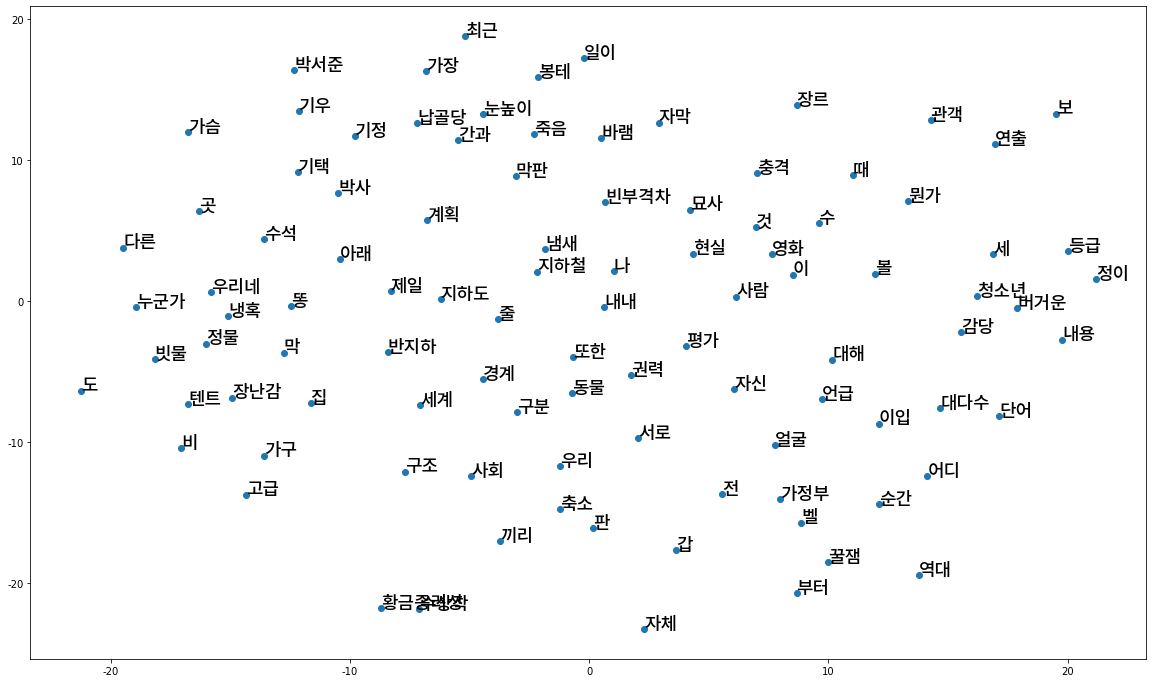

In [ ]:
#@title 2차원 시각화
시각화단어량 = 100  #@param {type: "number"}
출력가로크기 = 20  #@param {type: "number"}
출력세로크기 = 12 #@param {type: "number"}

from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
import gensim 
import gensim.models as g

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

model_name = 'ko_word2vec_e.model'
model = g.Doc2Vec.load(model_name)

vocab = list(model.wv.vocab)
X = model[vocab]

print("전체 단어량: "+str(len(X)))
tsne = TSNE(n_components=2)

# 100개의 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(X[:시각화단어량,:])
# X_tsne = tsne.fit_transform(X)

df = pd.DataFrame(X_tsne, index=vocab[:시각화단어량], columns=['x', 'y'])

import matplotlib.font_manager as fm
path = '/usr/share/fonts/truetype/NotoSansCJKkr-Medium.otf'
fontprop = fm.FontProperties(fname=path, size=18)

fig = plt.figure()
fig.set_size_inches(출력가로크기, 출력세로크기)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontproperties=fontprop)
plt.show()


In [ ]:
#@title 3차원 시각화 - Embedding projector https://projector.tensorflow.org/
축소차원 = 3  #@param {type: "number"}
차원정보파일이름 = 'dimension.tsv'  #@param {type: "string"}
단어정보파일이름 = 'words.tsv'  #@param {type: "string"}


from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
import gensim 
import gensim.models as g

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

model_name = 'ko_word2vec_e.model'
model = g.Doc2Vec.load(model_name)

vocab = list(model.wv.vocab)
X = model[vocab]

tsne = TSNE(n_components=축소차원)

import time
start_vect=time.time()

X_tsne = tsne.fit_transform(X)
# X_tsne = tsne.fit_transform(X)

print("  ")
print("차원 축소 소요 시간: %0.2f Minutes"%((time.time() - start_vect)/60))

df = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y', 'z'])
df.to_csv(차원정보파일이름, sep="\t", index=False, header=None, encoding='utf-8')

dfword = pd.DataFrame(df.index)
dfword.to_csv(단어정보파일이름, sep="\t", index=False, header=None, encoding='utf-8')

print("###3차원 시각화용 데이터 준비 완료")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


  
차원 축소 소요 시간: 5.90 Minutes
###3차원 시각화용 데이터 준비 완료
